# Housing Market Mini-Project
This notebook contains **three mini-projects** using a real estate dataset:
1. Renovation Impact Analysis
2. Seasonal Price Patterns
3. Luxury Home Market Analysis

Tools: **Python (pandas, matplotlib, seaborn), Tableau**
Data Source: Provided `data.csv` containing 4,600 home sale records.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 1. Renovation Impact Analysis
**Goal:** Measure how much renovations increase property value.

/var/folders/50/stn6p0wx55b8zb2tpknb635r0000gn/T/ipykernel_8239/2950065885.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(min(len(g), 600), random_state=42))


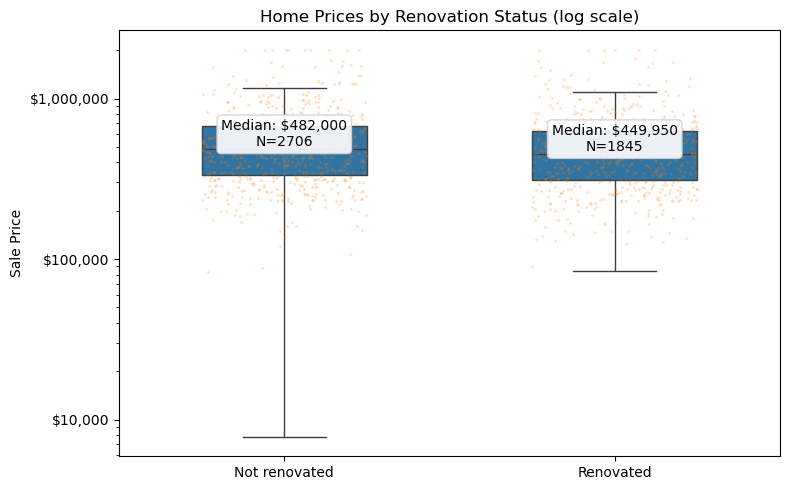

In [7]:
import numpy as np
from matplotlib.ticker import FuncFormatter

# Create renovation flag
df['is_renovated'] = df['yr_renovated'] > 0

# Copy and cap high prices
tmp = df.copy()
tmp = tmp[tmp["price"] > 0]
cap = tmp["price"].quantile(0.99)
tmp["price_capped"] = np.minimum(tmp["price"], cap)
tmp["is_renovated_label"] = np.where(tmp["is_renovated"], "Renovated", "Not renovated")

# Ensure "Not renovated" comes first
order = ["Not renovated", "Renovated"]

# Stats for annotation
stats = (
    tmp.groupby("is_renovated_label")["price_capped"]
      .agg(median="median", n="count")
      .reset_index()
)

# Boxplot
plt.figure(figsize=(8,5))
ax = sns.boxplot(
    data=tmp, x="is_renovated_label", y="price_capped",
    showfliers=False, width=0.5, order=order
)
ax.set_yscale("log")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}'))

# Add jittered sample points
sampled = tmp.groupby("is_renovated_label", group_keys=False) \
             .apply(lambda g: g.sample(min(len(g), 600), random_state=42))

sns.stripplot(
    data=sampled, x="is_renovated_label", y="price_capped",
    alpha=0.25, size=2, jitter=0.25, linewidth=0, ax=ax, order=order
)

# Titles and labels
ax.set_title("Home Prices by Renovation Status (log scale)")
ax.set_xlabel("")
ax.set_ylabel("Sale Price")

# Annotations
for i, row in stats.iterrows():
    ax.text(
        order.index(row["is_renovated_label"]), row["median"],
        f"Median: ${row['median']:,.0f}\nN={row['n']}",
        ha="center", va="bottom", fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="lightgray", alpha=0.9)
    )

plt.tight_layout()
plt.show()



### Renovation Impact on Home Prices (Log Scale)

markdown
### Renovation Impact on Home Prices (Log Scale)

This chart compares the sale prices of **renovated** vs. **non-renovated** homes.  
- **Data Processing**: Prices above the 99th percentile were capped to reduce the influence of extreme outliers, and the y-axis is shown on a log scale for better visibility of the full price range.  
- **Median Values**:  
  - Not renovated — Median: $482,000 (N=2,706)  
  - Renovated — Median: $449,950 (N=1,845)  
- **Key Insight**: In this dataset, renovated homes have a slightly *lower* median sale price than non-renovated homes, which may indicate that renovations are more common in lower-priced properties or that other factors (location, size, condition) have a stronger influence on price.  
- **Additional Detail**: Jittered points show a random sample of individual sales, providing a sense of distribution beyond the boxplot summary.

This visualization is useful for **ROI analysis** — showing whether renovations add measurable value in the market.






## 2. Seasonal Price Patterns
**Goal:** Detect monthly or seasonal price peaks.

# Assistant
The error occurs because the code is being interpreted as Python code, but it's actually Markdown text. The error specifically points to line 4 where there's a dollar sign ($) which Python interprets as trying to create an invalid decimal literal.

In Jupyter notebooks, you need to properly indicate that this is Markdown content, not Python code.

Would you like me to provide the corrected approach?

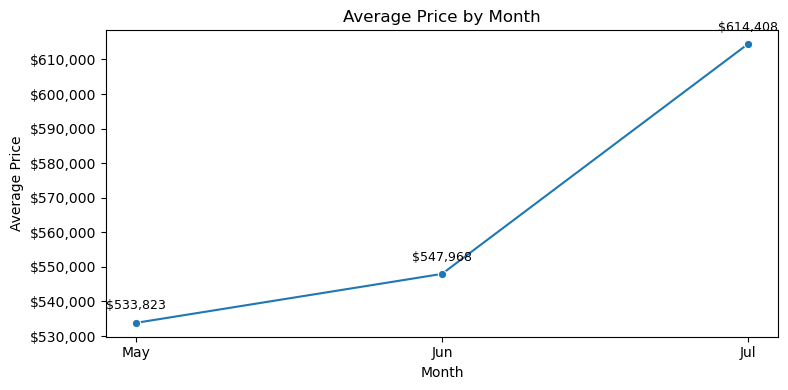

In [9]:
import calendar
from matplotlib.ticker import FuncFormatter

monthly_prices['month_name'] = monthly_prices['month'].apply(lambda x: calendar.month_abbr[int(x)])

plt.figure(figsize=(8,4))
ax = sns.lineplot(x='month_name', y='price', data=monthly_prices, marker='o')
ax.set_title('Average Price by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}'))

for i, row in monthly_prices.iterrows():
    ax.text(row['month_name'], row['price'] + 3000, f"${row['price']:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



### Seasonal Price Trends — Average Price by Month (Annotated)

This chart shows the **average sale price** for each month in the dataset, with values labeled above each point for quick reference.  
- **Observation**: Prices increased steadily from May to July, with the largest month-to-month jump occurring from June to July.  
- **Figures**:  
  - May — $533,823  
  - June — $547,968  
  - July — $614,408  
- **Interpretation**: This pattern suggests a potential **summer price peak**, possibly linked to increased demand during the traditional home-buying season.  
- **Limitation**: Only three months are represented; a full year of data is needed to confirm seasonal patterns.  
- **Use Case**: These insights can inform **pricing strategy** and **listing timing** for sellers aiming to maximize sale price.


## 3. Luxury Home Market Analysis
**Goal:** Profile the high-end housing market.

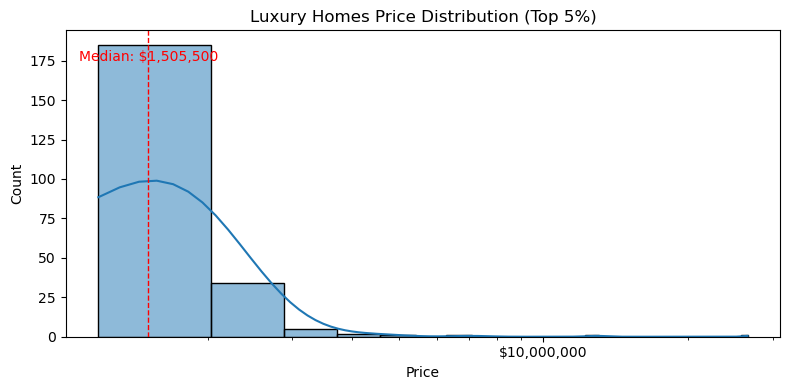

In [10]:
from matplotlib.ticker import FuncFormatter

price_threshold = df['price'].quantile(0.95)
luxury_df = df[df['price'] >= price_threshold]
median_price = luxury_df['price'].median()

plt.figure(figsize=(8,4))
ax = sns.histplot(luxury_df['price'], bins=30, kde=True)
ax.set_xscale('log')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.set_title('Luxury Homes Price Distribution (Top 5%)')
ax.set_xlabel('Price')
ax.set_ylabel('Count')

ax.axvline(median_price, color='red', linestyle='--', linewidth=1)
ax.text(median_price, ax.get_ylim()[1]*0.9, f"Median: ${median_price:,.0f}", color='red', ha='center')

plt.tight_layout()
plt.show()


### Luxury Homes Price Distribution (Top 5%) — Log Scale

This chart visualizes the price distribution for the top 5% most expensive homes in the dataset, using a log-scaled x-axis to better display the large spread in values.  
- **Luxury Threshold**: Properties with sale prices above the 95th percentile were classified as luxury homes.  
- **Median Price**: $1,505,500, indicated by the dashed red line.  
- **Insights**:  
  - Most luxury homes cluster just above the threshold, between $1M and $2M.  
  - A small number of ultra-luxury properties extend well beyond $10M, creating a highly skewed distribution.  
  - The log scale reveals detail in the lower range that would otherwise be compressed by extreme outliers.  
- **Use Case**: Helps identify price segmentation within the luxury housing market and supports targeted pricing and marketing strategies.
